In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')
import seaborn as sns

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8,  rc={"lines.linewidth": 3})
sns.set_palette(sns.color_palette("deep"))

#### Auxiliar function for building animation for function

In [3]:
def animate2D(i,func,t0,dt,rline,left_point,right_point,v_left,v_right,title,v,L):
    #Get list of t points up to ith time:
    tf = t0+dt*(i+1)
    xpts = rline.get_data()[0]
    ypts = func(t=tf,x=xpts,v=v,L=L)

    if title:
        title.set_text(r't = %1.1f s' %(tf))
    
    rline.set_data(xpts,ypts)
    left_point.set_data([v*tf],[func(t=tf,x=v*tf,v=v,L=L)])
#     right_point.set_data([max(xpts)],[func(t=tf,x=max(xpts),v=v,L=L)])

    
    return (rline,)


def setupFig(func,t0,xpts,**kwargs):
    ypts = func(t=t0,x=xpts,**kwargs)
    xmin,xmax = min(xpts),max(xpts)
    ymin,ymax = min(ypts),max(ypts)
    ymin = 2.2
    ymax = -2.2    
        
    fig = plt.figure(figsize=(6,4))
    ax1 = plt.subplot(111)
    ax1.set_xlim(xmin,xmax)
    ax1.set_ylim(ymin,ymax)
#     ax1.set_yticks([])
#     ax1.set_xticks([])
    ax1.set_xlabel(r'$x$ (m)')
    ax1.set_ylabel(r'$\phi$')

    title = ax1.set_title("t = %1.1f" %t0)
    
    #Plot function
    rline, = ax1.plot(xpts,ypts,'-',alpha=0.9)
    
    #Plot points:
    left_point, = ax1.plot([v*t0],[func(t=t0,x=v*t0,**kwargs)],'o',markersize=14,
                           zorder=10,color='brown') 
    right_point, = ax1.plot([2*np.pi*L,2*np.pi*L],[-1.1,1.1],'--',
                           zorder=10,color='gray') 
    #Plot vertical lines
    v_left = ax1.hlines(y=func(t=t0,x=xmin,**kwargs),xmin=xmin,xmax=xmax,linestyle='--',color='gray',alpha=0)
    v_right = ax1.hlines(y=func(t=t0,x=xmax,**kwargs),xmin=xmin,xmax=xmax,linestyle='--',color='gray',alpha=0)
    hline = ax1.hlines(y=0.0,xmin=xmin,xmax=xmax,linestyle='-',color='red',alpha=0.5)
    
    plt.tight_layout()
    
    return fig,rline,left_point,right_point,v_left,v_right,title

### Onda plana

In [4]:
@np.vectorize
def E(t,x,v,L=1.0):
    return np.cos((x-v*t)/L)

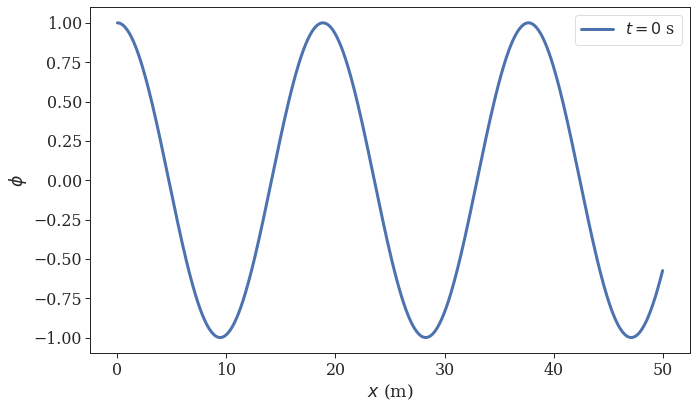

In [5]:
#Constantes em unidades arbitrárias:
v = 2 #velocidade de propagacao
L = 3.0
#Condicoes iniciais:
t0 = 0
xpts = np.linspace(0,50,500)
E_sol = E(t=t0,x=xpts,v=v,L=L)
E_sol2 = E(t=4,x=xpts,v=v,L=L)
fig = plt.figure(figsize=(10,6))
plt.plot(xpts,E_sol,label=r'$t = 0$ s')
# plt.plot(xpts,E_sol2,label=r'$t = 4$ s')
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$\phi$')
plt.legend()
plt.tight_layout()
plt.savefig('ondaPropagacao0.png')
plt.show()

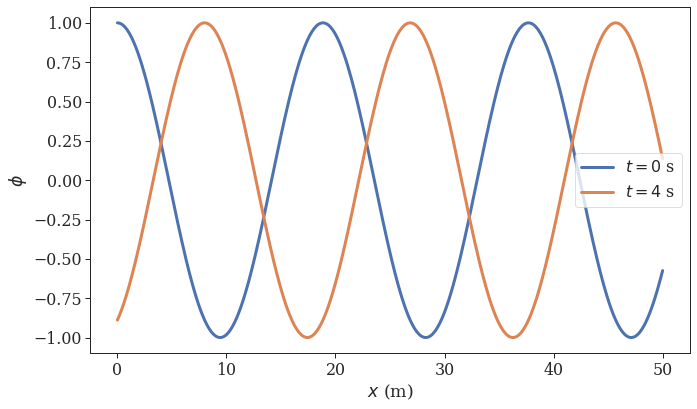

In [6]:
#Constantes em unidades arbitrárias:
v = 2 #velocidade de propagacao
L = 3.0
#Condicoes iniciais:
t0 = 0
xpts = np.linspace(0,50,500)
E_sol = E(t=t0,x=xpts,v=v,L=L)
E_sol2 = E(t=4,x=xpts,v=v,L=L)
fig = plt.figure(figsize=(10,6))
plt.plot(xpts,E_sol,label=r'$t = 0$ s')
plt.plot(xpts,E_sol2,label=r'$t = 4$ s')
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$\phi$')
plt.legend()
plt.tight_layout()
plt.savefig('ondaPropagacao1.png')
plt.show()

### Onda gaussiana

In [7]:
@np.vectorize
def Egauss(t,x,v,mu=1.0,sigma=1.0):
    return np.exp(-(x-mu-v*t)**2/(2*sigma**2))

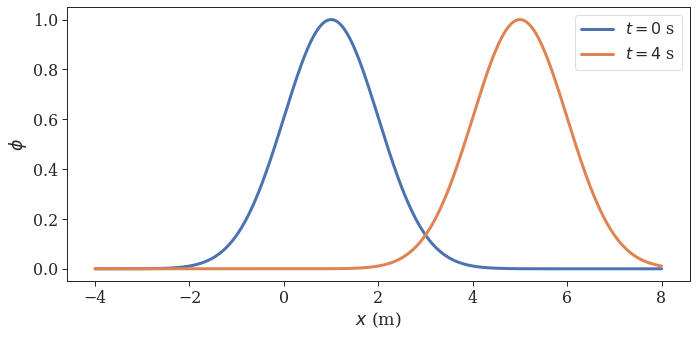

In [8]:
#Constantes em unidades arbitrárias:
v = 2 #velocidade de propagacao

#Condicoes iniciais:
t0 = 0
xpts = np.linspace(-4,8,500)
E_sol = Egauss(t=t0,x=xpts,v=v)
E_sol2 = Egauss(t=2,x=xpts,v=v)
fig = plt.figure(figsize=(10,5))
plt.plot(xpts,E_sol,label=r'$t = 0$ s')
plt.plot(xpts,E_sol2,label=r'$t = 4$ s')
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$\phi$')
plt.legend()
plt.tight_layout()
plt.savefig('ondaPropagacao2.png')
plt.show()

In [9]:
#Set up plot
t0,tmax = 0.0,30
n = 2
v = 2.0
L = 3.0
xpts = np.linspace(0,50,500)
fig,rline,left_point,right_point,v_left,v_right,title = setupFig(E,t0,xpts,v=v,L=L)
#Define time step:
dt = (tmax-t0)/300.
#Define real time step:
interval = 20

anim = animation.FuncAnimation(fig, animate2D,
                               frames=int((tmax-t0)/dt), interval=interval, 
                               blit=True, fargs=(E,t0,dt,rline,left_point,right_point,v_left,v_right,title,v,L))
plt.close()
anim


In [10]:
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='AL'), bitrate=1800)
anim.save('propagatingWave1.mp4', writer=writer)